In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

ITEM 0: Pré-processamento

In [20]:
wp = pd.read_csv('dataset\water_potability.csv')
wp = wp.dropna() # retirando as linhas com dados faltantes
wp.columns = ['pH', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfato', 'Condutividade', 'Carbono Orgânico', 'Trialometano', 'Turbidez', 'Potabilidade']
print(wp.shape)
wp.head()

(2011, 10)


,pH,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono Orgânico,Trialometano,Turbidez,Potabilidade
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


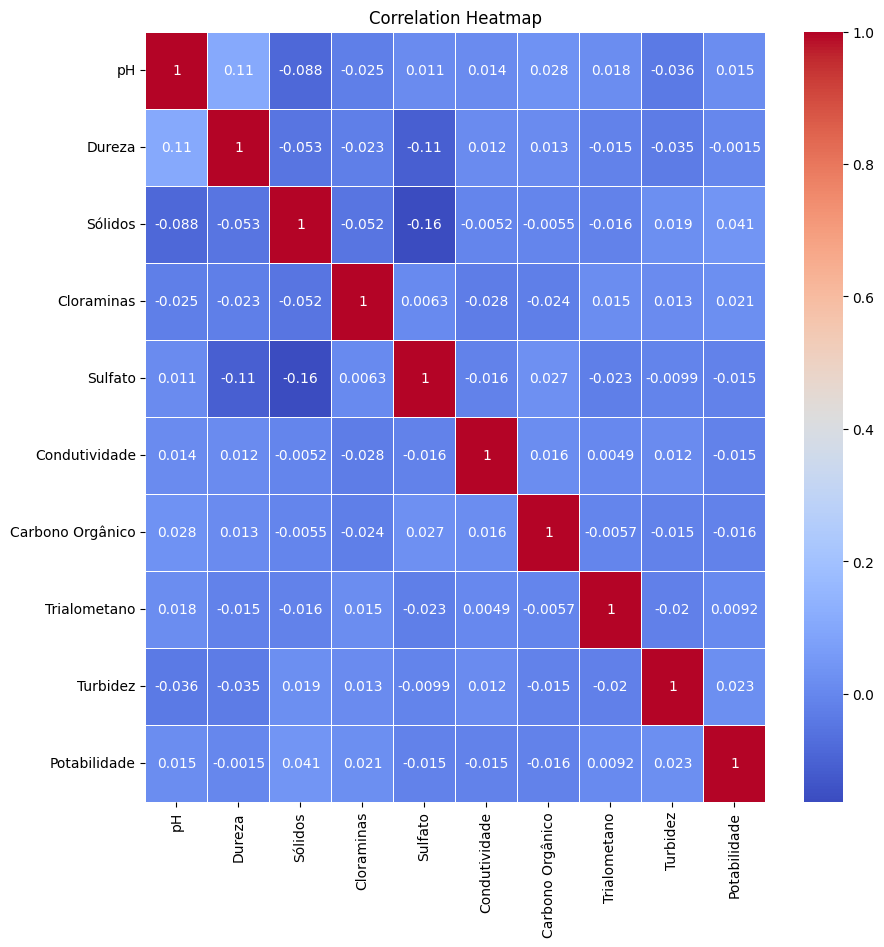

In [22]:
correlationMatrix = wp.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
wp.skew()

pH                  0.048947
Dureza             -0.085237
Sólidos             0.595894
Cloraminas          0.012976
Sulfato            -0.046558
Condutividade       0.266869
Carbono Orgânico   -0.020018
Trialometano       -0.051422
Turbidez           -0.033051
Potabilidade        0.394614
dtype: float64

In [35]:
# Transformação de Box-Cox
pt = PowerTransformer(method='box-cox')
x = wp.drop(columns=['Potabilidade'])
y = wp['Potabilidade']
data = pt.fit_transform(x)
dataset = pd.DataFrame(data)
dataset.head()

,0,1,2,3,4,5,6,7,8
0,0.782169,0.555513,0.105387,0.581953,0.568504,-0.763023,1.229268,2.143702,0.844076
1,1.276398,-0.469340,-0.378730,-0.374256,-0.568325,-0.298170,-0.843789,-2.104966,0.130673
2,-0.955185,-0.249864,0.827853,0.256091,-0.169017,-1.976204,-1.784952,-0.720985,-1.797105
3,1.998433,1.623109,0.827957,0.236185,1.480057,-1.925878,-0.174314,1.137072,-1.654491
4,0.985476,0.212917,-0.954877,-1.617646,-0.732102,0.631961,-0.602498,-0.233774,0.550656


In [33]:
dataset.skew()

0    0.059249
1    0.031356
2    0.020447
3    0.039982
4    0.039658
5   -0.009868
6    0.001309
7    0.013452
8   -0.005868
dtype: float64